In [39]:
import cv2
import glob
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

In [30]:
# Information about the image (i.e. /images/{path}/*.{format})
IMAGES_PATH = "samples"
IMAGES_FORMAT = "jpg"
CHESSBOARD_SIZE = (7, 6)

In [57]:
# Returns the number of successes
def len_successes(results):
    return len(list(filter(lambda result: result is not None, results)))

In [58]:
# Create the `Path` object
path = Path("images") / Path(IMAGES_PATH) / Path(f"*.{IMAGES_FORMAT}")
img_paths = glob.glob(str(path))

# Store the loaded images here, with `None` representing failure.
imgs = []

# Load the images
for img_path in img_paths:
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image at {img_path}!")
    else:
        print(f"Loaded image at {img_path}...")
    imgs.append(img)
    
print(f"Done! {len_successes(imgs)} images found.")

Loaded image at images/samples/left09.jpg...
Loaded image at images/samples/left08.jpg...
Loaded image at images/samples/left14.jpg...
Loaded image at images/samples/left01.jpg...
Loaded image at images/samples/left03.jpg...
Loaded image at images/samples/left02.jpg...
Loaded image at images/samples/left12.jpg...
Loaded image at images/samples/left06.jpg...
Loaded image at images/samples/left07.jpg...
Loaded image at images/samples/left13.jpg...
Loaded image at images/samples/left05.jpg...
Loaded image at images/samples/left11.jpg...
Loaded image at images/samples/left04.jpg...
Done! 13 images found.


Failed to find corners for images/samples/left09.jpg :(
Successfully found corners for images/samples/left08.jpg!


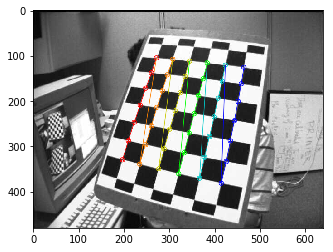

Successfully found corners for images/samples/left14.jpg!


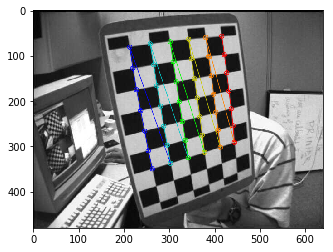

Successfully found corners for images/samples/left01.jpg!


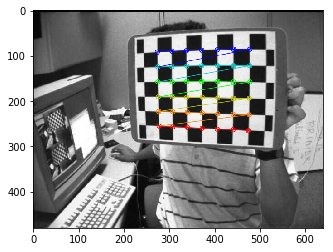

Successfully found corners for images/samples/left03.jpg!


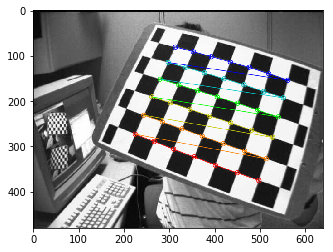

Successfully found corners for images/samples/left02.jpg!


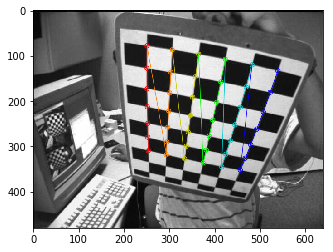

Successfully found corners for images/samples/left12.jpg!


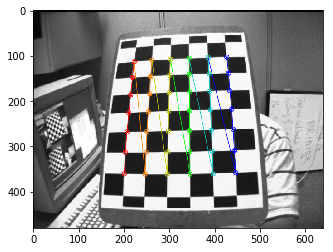

Successfully found corners for images/samples/left06.jpg!


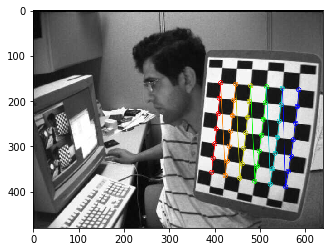

Successfully found corners for images/samples/left07.jpg!


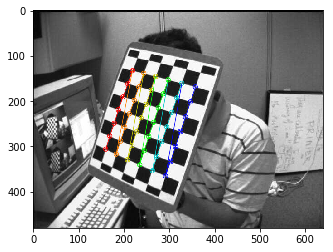

Successfully found corners for images/samples/left13.jpg!


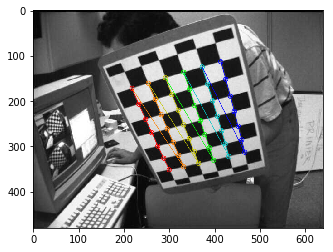

Successfully found corners for images/samples/left05.jpg!


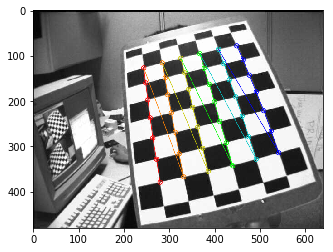

Failed to find corners for images/samples/left11.jpg :(
Successfully found corners for images/samples/left04.jpg!


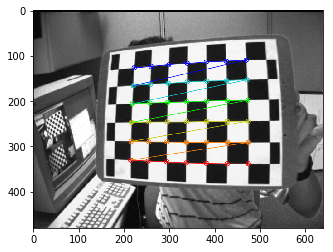

Done! 11 chessboard corners found.


In [59]:
# Termination criteria
TERM_CRITERIA = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Create object points
OBJECT_POINTS = np.zeros((6*7,3), np.float32)
OBJECT_POINTS[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Store the resulting object and image points here, with `None` indicating failure.
obj_points = []
img_points = []

# Find all the chessboard corners.
for (i, img) in enumerate(imgs):
    # Check for previous failure
    if img is None:
        continue
        
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray_img, CHESSBOARD_SIZE, None)
    
    if ret:
        print(f"Successfully found corners for {img_paths[i]}!")
        
        # Further increase the accuracy of the corners
        cv2.cornerSubPix(gray_img, corners, (11, 11), (-1, -1), TERM_CRITERIA)
        
        # Append `corners` to the list of corners.
        obj_points.append(OBJECT_POINTS)
        img_points.append(corners)
        
        # Display the image with the corners
        show_img = cv2.drawChessboardCorners(img, CHESSBOARD_SIZE, corners, ret)
        show_img = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
        plt.imshow(show_img)
        plt.show()
    else:
        print(f"Failed to find corners for {img_paths[i]} :(")
        
        # Append `None`, which indicates a failure.
        img_points.append(None)
        
print(f"Done! {len_successes(img_points)} chessboard corners found.")